In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_ibm_runtime
!pip install qiskit_aer

In [1]:
import numpy as np
import pandas as pd
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import *
from qiskit_aer import AerSimulator

In [2]:
# Function for plotting the quantum circuit
def qplot(qc):
    return qc.draw('mpl', scale=0.8, initial_state= True, fold=-1)

def latex(quantum_state):
  return Statevector(quantum_state).draw('latex')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/2- Programming/Python/2- Qiskit/0000- Quantum_Computation_Algorithms/Quantum-Algorithms
%ls

/content/drive/MyDrive/2- Programming/Python/2- Qiskit/0000- Quantum_Computation_Algorithms/Quantum-Algorithms
 Brenstien_Vazirani_Algorithm/          oracles/                          README.md
'Deutsch_&_Deutsch-Jozsa_algorithms'/   Quantum_Fourier_Transformation/   Shor_Algorithm/
'Grover_Algorithm_&_Generalizations'/   Quantum_Phase_Estimation/         Simon_Algorithm/


In [5]:
from oracles import SimonOracle

In [6]:
# Length of the hidden string which is exactly equal to the number of qubits
num_qubits = 3

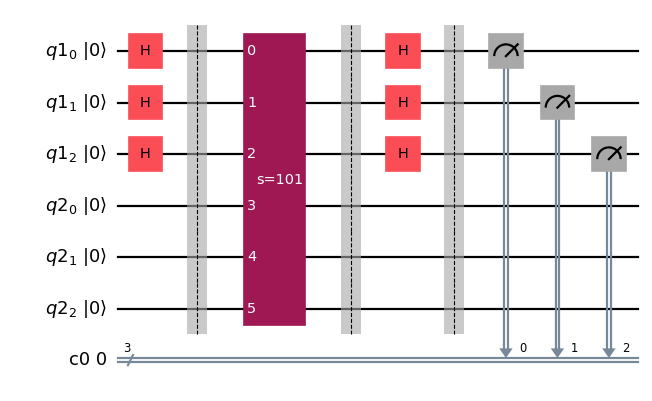

In [7]:
q_reg = QuantumRegister(num_qubits)    # Main register Input qubits
a_reg = QuantumRegister(num_qubits)
c_reg = ClassicalRegister(num_qubits)  # Ancillary register with only one qubit
# Building the QuantumCircuit
qc = QuantumCircuit(q_reg, a_reg, c_reg)

# preparing the ancilla qubit in the state $|->$
qc.h(q_reg)
qc.barrier()

# Applying the Brenstein-Vazirani oracle to the circuit
simon_oracle = SimonOracle(num_qubits=num_qubits, hidden_string = '101')
oracle = simon_oracle.create_oracle()

# Appending the oracle to the circuit
qc.append(oracle, [i for i in range(num_qubits * 2) ])
qc.barrier()
############## final Hadard gates
qc.h(q_reg)
qc.barrier()
########### Measurement
qc.measure(q_reg, c_reg)

qplot(qc)

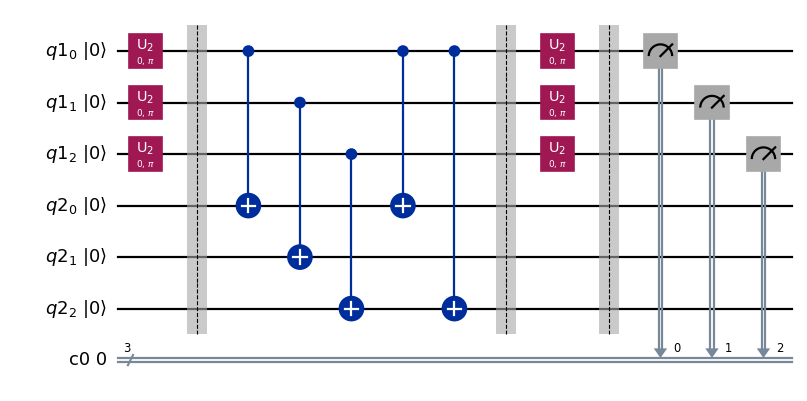

In [8]:
qplot(qc.decompose())

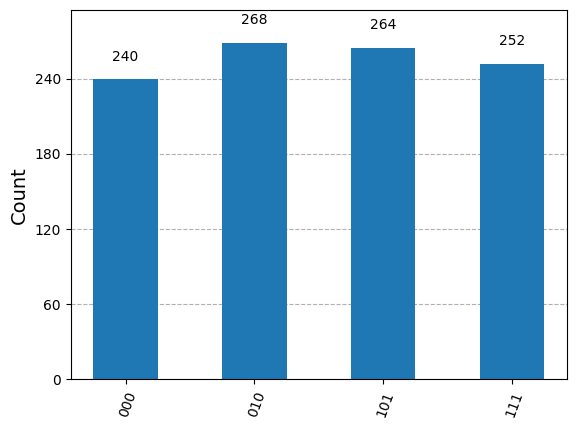

In [9]:
simulator = AerSimulator()
job = simulator.run(transpile(qc, simulator), shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [10]:
counts

{'000': 240, '010': 268, '101': 264, '111': 252}

In [10]:
counts_list = []
for i in counts.keys():
  a = i[::-1]
  counts_list.append(a)

counts_list

['010', '000', '111', '101']

## Finding the hidden string by building a system of equations as follows

In [1]:
import sympy as sp

# Define the variables
p0, p1, p2 = sp.symbols('p0 p1 p2')

# Define the system of equations (in terms of mod 2)
eq1 = sp.Eq(p1, 0)         # p1 = 0
eq2 = sp.Eq(p0 + p2, 0)    # p0 ⊕ p2 = 0
eq3 = sp.Eq(p0 + p1 + p2, 0)  # p0 ⊕ p1 ⊕ p2 = 0

# Solve the equations
solution = sp.solve([eq1, eq2, eq3], (p0, p1, p2))

print(solution)


{p0: -p2, p1: 0}


By considering the mod 2 question p0 = -p2 means these two variable are equal, both can be zero or one. Since '000' string is a 1 to 1 function hidden string must be '101'.

In [19]:
# we can see the exact hidden string by using the followin code
simon_oracle.get_hidden_string()

'101'